# Stage 1 : Exploratory Data Analysis

## 1.1 Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
pal = sns.color_palette()

from scipy import stats

In [2]:
#lib for preprocessing
# Library for Scalling Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import boxcox
import warnings
# Library for Split Data
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [3]:
# Import Library

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate

# Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [4]:
df = pd.read_csv('Clicked Ads Dataset.csv')

In [5]:
df

Unnamed: 0  Daily Time Spent on Site  Age  Area Income  \
0             0                     68.95   35  432837300.0   
1             1                     80.23   31  479092950.0   
2             2                     69.47   26  418501580.0   
3             3                     74.15   29  383643260.0   
4             4                     68.37   35  517229930.0   
..          ...                       ...  ...          ...   
995         995                     72.97   30  499691990.0   
996         996                     51.30   45  474475190.0   
997         997                       NaN   51  296910040.0   
998         998                     55.55   19  293445530.0   
999         999                     45.01   26  209130600.0   

     Daily Internet Usage       Male        Timestamp Clicked on Ad  \
0                  256.09  Perempuan   3/27/2016 0:53            No   
1                  193.77  Laki-Laki    4/4/2016 1:39            No   
2                  236.50  Perempuan  3/13/2016 20:35            No   
3                  245.89  Laki-Laki   1/10/2016 2:31            No   
4                  225.58  Perempuan    6/3/2016 3:36            No   
..                    ...        ...              ...           ...   
995                208.58  Laki-Laki  2/11/2016 21:49           Yes   
996                134.42  Laki-Laki   4/22/2016 2:07           Yes   
997                120.37  Laki-Laki   2/1/2016 17:24           Yes   
998                187.95  Perempuan   3/24/2016 2:35            No   
999                178.35  Perempuan   6/3/2016 21:43           Yes   

              city                       province    category  
0    Jakarta Timur  Daerah Khusus Ibukota Jakarta   Furniture  
1         Denpasar                           Bali        Food  
2         Surabaya                     Jawa Timur  Electronic  
3            Batam                 Kepulauan Riau       House  
4            Medan                  Sumatra Utara     Finance  
..             ...                            ...         ...  
995       Semarang                    Jawa Tengah     Finance  
996      Pakanbaru                           Riau  Electronic  
997      Samarinda               Kalimantan Timur      Travel  
998      Tangerang                         Banten        Bank  
999         Serang                         Banten      Travel  

[1000 rows x 11 columns]

## 1.2 Descriptive Statistics

### a. Missing Value

In [6]:
#General information & missing value check 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


### b. Duplicate Value Check

In [7]:
df.duplicated().sum()

0

### c. Statistical Summary 

In [8]:
df.describe()

Unnamed: 0  Daily Time Spent on Site          Age   Area Income  \
count  1000.000000                987.000000  1000.000000  9.870000e+02   
mean    499.500000                 64.929524    36.009000  3.848647e+08   
std     288.819436                 15.844699     8.785562  9.407999e+07   
min       0.000000                 32.600000    19.000000  9.797550e+07   
25%     249.750000                 51.270000    29.000000  3.286330e+08   
50%     499.500000                 68.110000    35.000000  3.990683e+08   
75%     749.250000                 78.460000    42.000000  4.583554e+08   
max     999.000000                 91.430000    61.000000  5.563936e+08   

       Daily Internet Usage  
count            989.000000  
mean             179.863620  
std               43.870142  
min              104.780000  
25%              138.710000  
50%              182.650000  
75%              218.790000  
max              267.010000

## 1.3 Univariate Analysis

In [9]:
#select dtypes object
obj = df.select_dtypes(include='object').columns
obj

Index(['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category'], dtype='object')

In [10]:
#select dtypes int & float
num = df.select_dtypes(include=['int64','float64']).columns
num

Index(['Unnamed: 0', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage'],
      dtype='object')

In [11]:
#change variable cat & num
categoricals = obj
numericals = num

In [12]:
#check len
print(len(categoricals))
print(len(numericals))

6
5


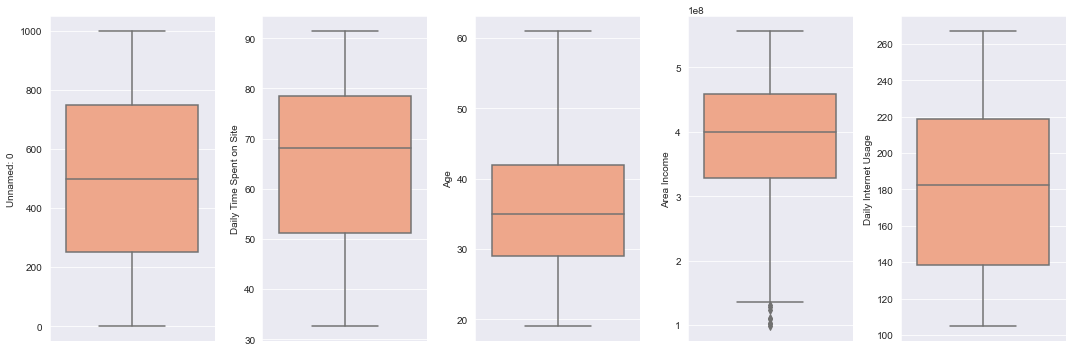

In [13]:
#looping for univariate analysis
plt.figure(figsize=(15,5))

#boxplot
for i in range(len(numericals)):
    plt.subplot(1,5,i+1)
    sns.boxplot(y=df[numericals[i]],color='lightsalmon')
    plt.tight_layout()

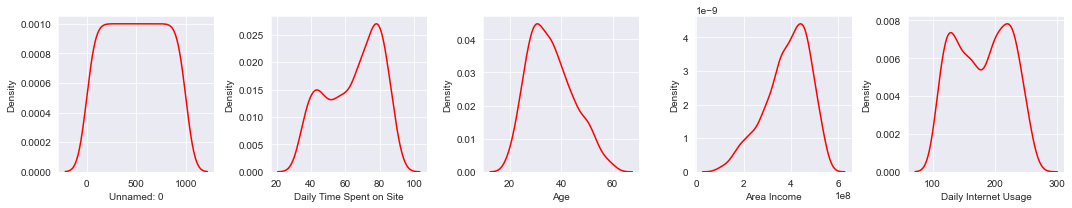

In [14]:
#Distrbution Plot

plt.figure(figsize=(15,3))

for i in range(len(numericals)):
    plt.subplot(1,5,i+1)
    sns.kdeplot(x=df[numericals[i]],color='r')
    plt.xlabel(numericals[i])
    plt.tight_layout()

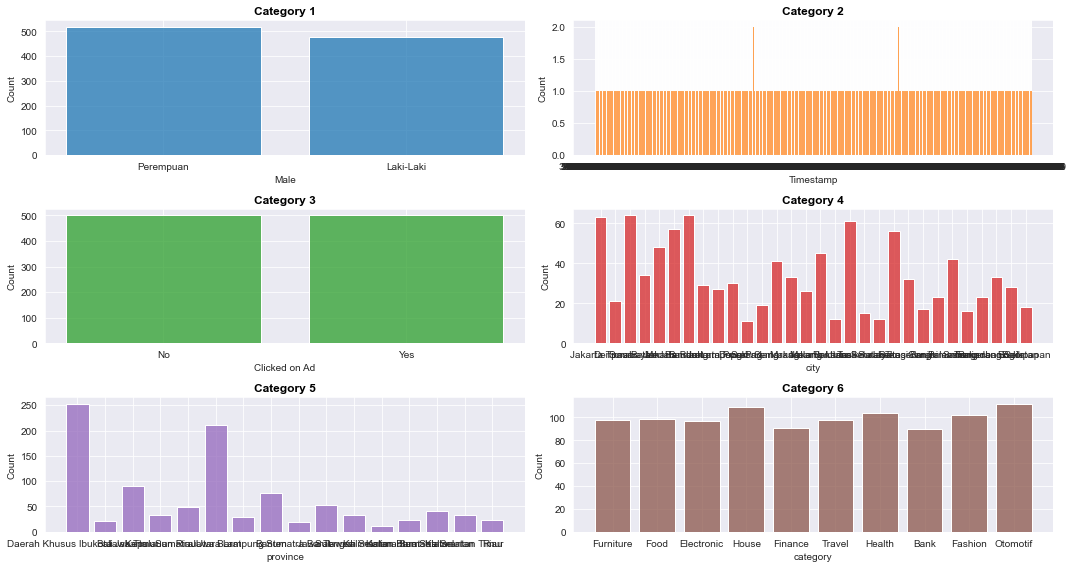

In [15]:
#Count Plot

plt.figure(figsize=(15,8))
title = ['Category 1','Category 2','Category 3','Category 4','Category 5','Category 6']

for i in range(len(categoricals)):
    plt.subplot(3,2,i+1)
    sns.histplot(df[categoricals[i]],color=pal[i],shrink=0.8)
    plt.title(title[i],fontweight='bold',fontsize=12,color='black')
    plt.tight_layout()

## Bivariate Analysis

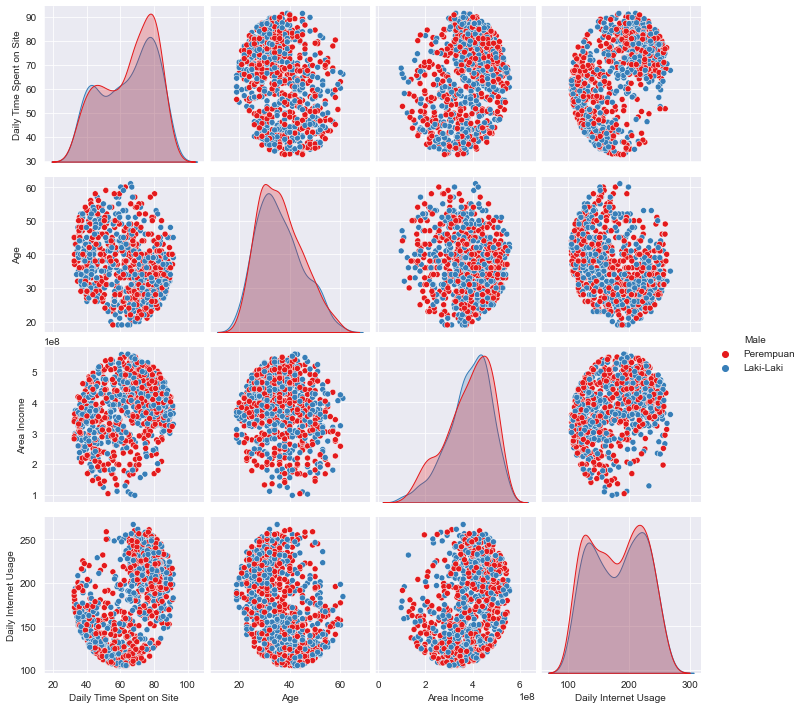

In [16]:
# Scatter plot
df2 = df.drop('Unnamed: 0', axis = 1)
sns.pairplot(df2, diag_kind='kde', hue='Male',palette='Set1')
plt.show()

In [17]:
# # Scatter plot
# # df2 = df.drop('Unnamed: 0', axis = 1)
# sns.pairplot(df2, diag_kind='kde', hue='Timestamp',palette='Set1')
# plt.show()

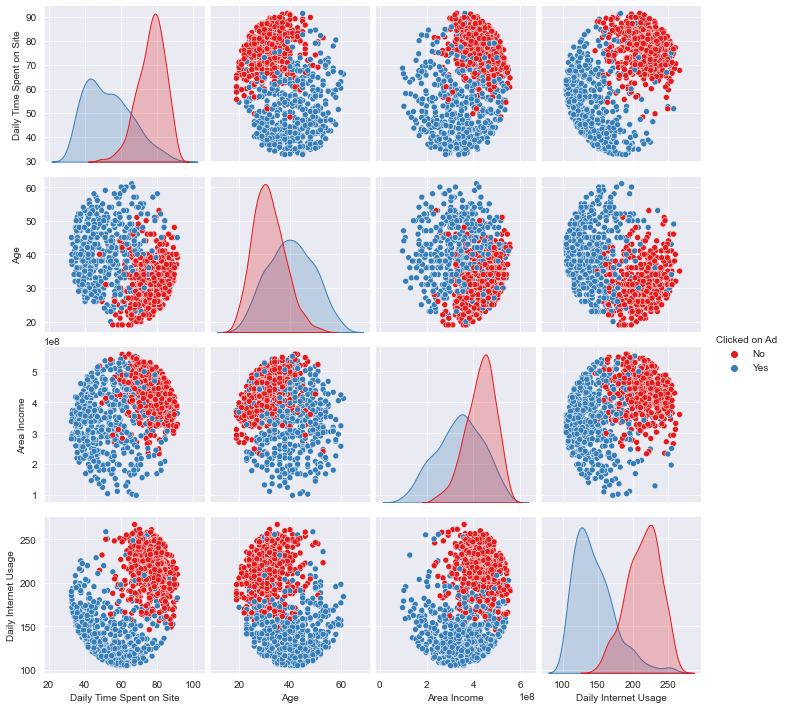

In [18]:
# Scatter plot
# df2 = df.drop('Unnamed: 0', axis = 1)
sns.pairplot(df2, diag_kind='kde', hue='Clicked on Ad',palette='Set1')
plt.show()

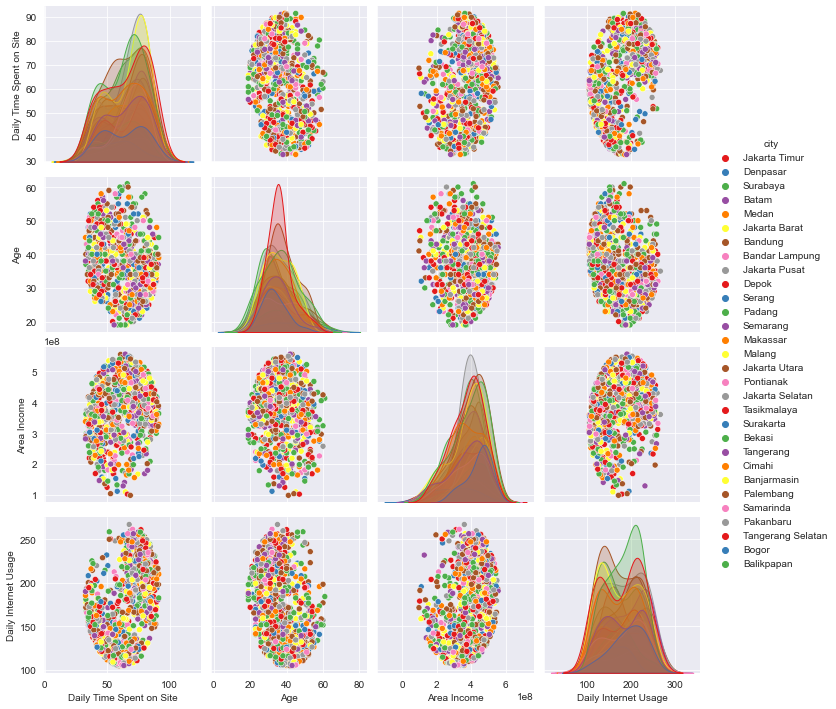

In [19]:
# Scatter plot
# df2 = df.drop('Unnamed: 0', axis = 1)
sns.pairplot(df2, diag_kind='kde', hue='city',palette='Set1')
plt.show()

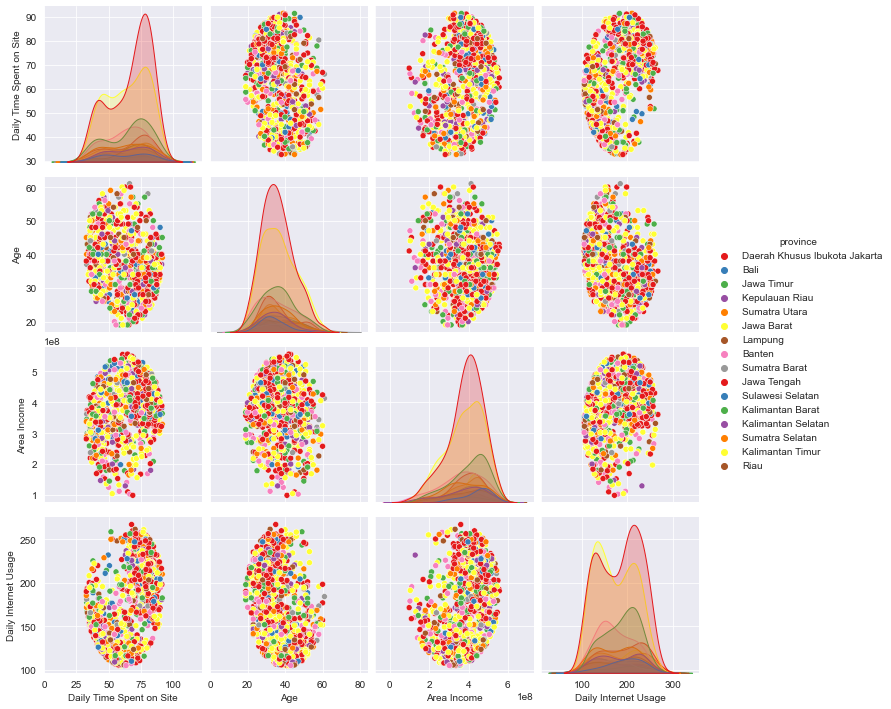

In [20]:
# Scatter plot
# df2 = df.drop('Unnamed: 0', axis = 1)
sns.pairplot(df2, diag_kind='kde', hue='province',palette='Set1')
plt.show()

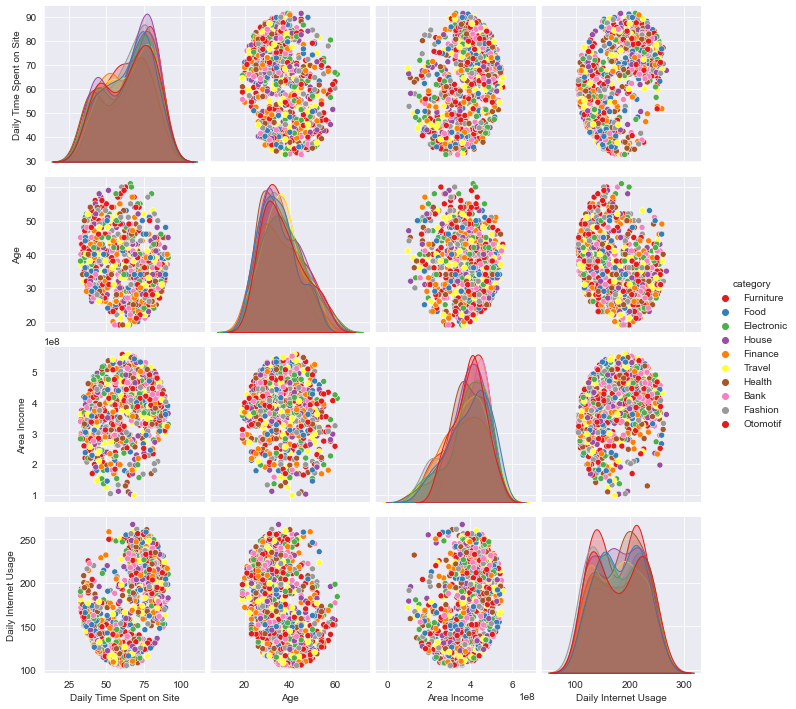

In [21]:
# Scatter plot
# df2 = df.drop('Unnamed: 0', axis = 1)
sns.pairplot(df2, diag_kind='kde', hue='category',palette='Set1')
plt.show()

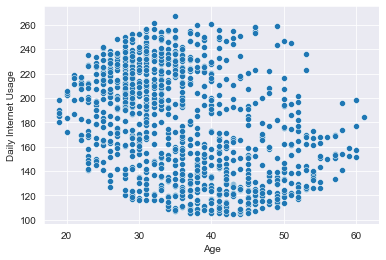

In [22]:
sns.scatterplot(x='Age', y='Daily Internet Usage', data=df2)
plt.show()

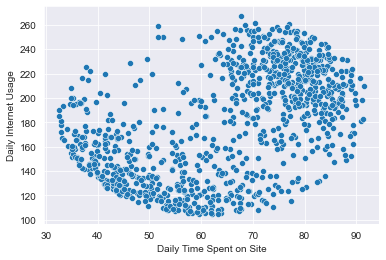

In [23]:
sns.scatterplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=df2)
plt.show()

## 1.4 Multivariate Analysis

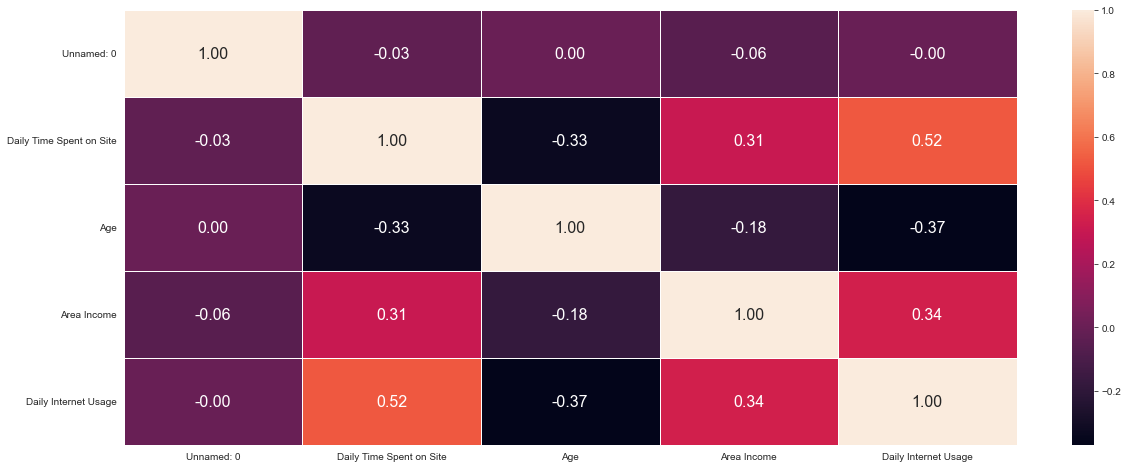

In [24]:
#multivariate analysis

plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',annot_kws={'fontsize': 16},linewidths=.5)
plt.yticks(rotation=0)
plt.show()

## 1.5 Business Insight

In [25]:
df['city'].unique()

array(['Jakarta Timur', 'Denpasar', 'Surabaya', 'Batam', 'Medan',
       'Jakarta Barat', 'Bandung', 'Bandar Lampung', 'Jakarta Pusat',
       'Depok', 'Serang', 'Padang', 'Semarang', 'Makassar', 'Malang',
       'Jakarta Utara', 'Pontianak', 'Jakarta Selatan', 'Tasikmalaya',
       'Surakarta', 'Bekasi', 'Tangerang', 'Cimahi', 'Banjarmasin',
       'Palembang', 'Samarinda', 'Pakanbaru', 'Tangerang Selatan',
       'Bogor', 'Balikpapan'], dtype=object)

# 2. Data Pre-Processing

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


## 2.1 Data Cleaning

### a. Handle Duplicated Data

In [27]:
df.duplicated().sum()

0

### b. Handle Missing Value (NaN & Null)

In [28]:
#melihat data yang bernilai NaN atau Null
df.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [29]:
df.isna().any().count()

11

In [30]:
df.columns[df.isna().any()].tolist()

['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage', 'Male']

#### 

In [31]:
df.isnull().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [32]:
#menghapus baris yang mengandung NaN & Null
df = df.dropna(subset=['Daily Time Spent on Site','Area Income','Daily Internet Usage','Male'])

In [33]:
df.isna().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

In [34]:
df.isnull().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

### c. Handle Formatting (Data Type)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                963 non-null    int64  
 1   Daily Time Spent on Site  963 non-null    float64
 2   Age                       963 non-null    int64  
 3   Area Income               963 non-null    float64
 4   Daily Internet Usage      963 non-null    float64
 5   Male                      963 non-null    object 
 6   Timestamp                 963 non-null    object 
 7   Clicked on Ad             963 non-null    object 
 8   city                      963 non-null    object 
 9   province                  963 non-null    object 
 10  category                  963 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 90.3+ KB


In [36]:
#mengecek kolom dan tipe data
df.dtypes

Unnamed: 0                    int64
Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Male                         object
Timestamp                    object
Clicked on Ad                object
city                         object
province                     object
category                     object
dtype: object

In [37]:
#memisahkan kolom berdasarkan tipenya

df.select_dtypes(['int64','float64']).columns

Index(['Unnamed: 0', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage'],
      dtype='object')

In [38]:
df.select_dtypes('object').columns

Index(['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category'], dtype='object')

In [39]:
num = df.select_dtypes(['int64','float64']).columns

In [40]:
cat = df.select_dtypes('object').columns

In [41]:
num

Index(['Unnamed: 0', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage'],
      dtype='object')

In [42]:
#melihat kolom dengan tipe data objek dan jumlah nilai uniknya
df.select_dtypes(['int','float']).apply(pd.Series.nunique,axis=0)

Unnamed: 0                  963
Daily Time Spent on Site    872
Age                          43
Area Income                 963
Daily Internet Usage        930
dtype: int64

In [43]:
df.select_dtypes('object').apply(pd.Series.nunique,axis=0)

Male               2
Timestamp        960
Clicked on Ad      2
city              30
province          16
category          10
dtype: int64

### d. Handle Invalid Values

In [44]:
#cek invalid values for category 
for i in cat:
    print(i)
    print(df[i].value_counts())
    print('')

Male
Perempuan    502
Laki-Laki    461
Name: Male, dtype: int64

Timestamp
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/20/2016 0:00     1
6/13/2016 11:06    1
                  ..
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
4/18/2016 0:49     1
6/3/2016 21:43     1
Name: Timestamp, Length: 960, dtype: int64

Clicked on Ad
Yes    485
No     478
Name: Clicked on Ad, dtype: int64

city
Bandung              64
Surabaya             61
Jakarta Timur        60
Jakarta Selatan      59
Jakarta Barat        57
Bekasi               55
Medan                47
Jakarta Utara        43
Semarang             39
Palembang            39
Batam                34
Tangerang Selatan    32
Tangerang            31
Depok                30
Bandar Lampung       28
Makassar             28
Bogor                27
Malang               26
Jakarta Pusat        25
Banjarmasin          22
Pakanbaru            21
Denpasar             19
Padang               19
Balikpapan           1

In [45]:
#cek invalid values for numeric 
for i in num:
    print(i)
    print(df[i].value_counts())
    print('')

Unnamed: 0
0      1
750    1
658    1
659    1
660    1
      ..
339    1
340    1
341    1
342    1
999    1
Name: Unnamed: 0, Length: 963, dtype: int64

Daily Time Spent on Site
78.76    3
75.55    3
62.26    3
77.05    3
72.23    2
        ..
73.19    1
77.60    1
89.00    1
69.20    1
45.01    1
Name: Daily Time Spent on Site, Length: 872, dtype: int64

Age
31    58
36    49
29    48
28    46
33    40
30    38
34    38
35    37
26    36
32    36
40    36
38    35
37    33
27    32
41    31
45    30
39    28
25    27
42    25
43    22
44    21
50    20
24    19
23    18
46    17
49    17
48    16
52    15
47    13
22    11
51    11
53    10
54     9
55     7
21     6
19     6
20     5
57     5
58     4
60     3
56     2
59     2
61     1
Name: Age, dtype: int64

Area Income
432837300.0    1
405140050.0    1
488639900.0    1
422206330.0    1
471261000.0    1
              ..
423854620.0    1
405883100.0    1
369154310.0    1
326576250.0    1
209130600.0    1
Name: Area Income, Length

In [46]:
df.shape

(963, 11)

### e. Handle Outliers

In [47]:
df

Unnamed: 0  Daily Time Spent on Site  Age  Area Income  \
0             0                     68.95   35  432837300.0   
1             1                     80.23   31  479092950.0   
2             2                     69.47   26  418501580.0   
3             3                     74.15   29  383643260.0   
4             4                     68.37   35  517229930.0   
..          ...                       ...  ...          ...   
994         994                     43.70   28  441888720.0   
995         995                     72.97   30  499691990.0   
996         996                     51.30   45  474475190.0   
998         998                     55.55   19  293445530.0   
999         999                     45.01   26  209130600.0   

     Daily Internet Usage       Male        Timestamp Clicked on Ad  \
0                  256.09  Perempuan   3/27/2016 0:53            No   
1                  193.77  Laki-Laki    4/4/2016 1:39            No   
2                  236.50  Perempuan  3/13/2016 20:35            No   
3                  245.89  Laki-Laki   1/10/2016 2:31            No   
4                  225.58  Perempuan    6/3/2016 3:36            No   
..                    ...        ...              ...           ...   
994                173.01  Perempuan    4/4/2016 3:57           Yes   
995                208.58  Laki-Laki  2/11/2016 21:49           Yes   
996                134.42  Laki-Laki   4/22/2016 2:07           Yes   
998                187.95  Perempuan   3/24/2016 2:35            No   
999                178.35  Perempuan   6/3/2016 21:43           Yes   

              city                       province    category  
0    Jakarta Timur  Daerah Khusus Ibukota Jakarta   Furniture  
1         Denpasar                           Bali        Food  
2         Surabaya                     Jawa Timur  Electronic  
3            Batam                 Kepulauan Riau       House  
4            Medan                  Sumatra Utara     Finance  
..             ...                            ...         ...  
994    Tasikmalaya                     Jawa Barat     Fashion  
995       Semarang                    Jawa Tengah     Finance  
996      Pakanbaru                           Riau  Electronic  
998      Tangerang                         Banten        Bank  
999         Serang                         Banten      Travel  

[963 rows x 11 columns]

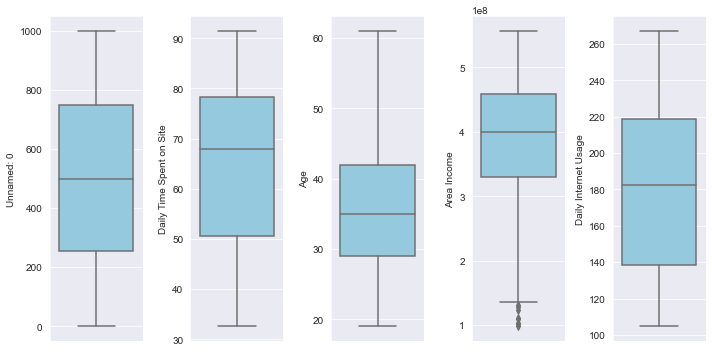

In [48]:
plt.figure(figsize=(10,5))
for i in range(0,len(num)):
    plt.subplot(1,5,i+1)
    sns.boxplot(y=df[num[i]], color = 'skyblue', orient = 'v')
    plt.tight_layout()

### IQR

In [49]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for i in num :
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[i] >= low_limit) & (df[i] <= high_limit)) & filtered_entries

df_iqr = df[filtered_entries]    
    
print(f'Jumlah baris setelah memfilter outlier: {len(df_iqr)}')


Jumlah baris sebelum memfilter outlier: 963
Jumlah baris setelah memfilter outlier: 955


### Z-Scores

In [50]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for i in num:
    z_scores = np.abs(stats.zscore(df[i]))
    filtered_entries = (z_scores < 2)
    
df_z = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_z)}')

Jumlah baris sebelum memfilter outlier: 963
Jumlah baris setelah memfilter outlier: 963


 **Karena tidak terlalu banyak outlier yang terhapus pada saat menggunakan IQR, maka metode IQR yang akan kita gunakan.**

In [51]:
df_iqr.shape

(955, 11)

#### 

## 2.2 Data Transformation

### a. Feature Scaling

#### - Min / Max Normalization

#### - Standarization

#### - Log Transformation

### b. Feature Encoding / Feature Engineering

In [52]:
df_iqr

Unnamed: 0  Daily Time Spent on Site  Age  Area Income  \
0             0                     68.95   35  432837300.0   
1             1                     80.23   31  479092950.0   
2             2                     69.47   26  418501580.0   
3             3                     74.15   29  383643260.0   
4             4                     68.37   35  517229930.0   
..          ...                       ...  ...          ...   
994         994                     43.70   28  441888720.0   
995         995                     72.97   30  499691990.0   
996         996                     51.30   45  474475190.0   
998         998                     55.55   19  293445530.0   
999         999                     45.01   26  209130600.0   

     Daily Internet Usage       Male        Timestamp Clicked on Ad  \
0                  256.09  Perempuan   3/27/2016 0:53            No   
1                  193.77  Laki-Laki    4/4/2016 1:39            No   
2                  236.50  Perempuan  3/13/2016 20:35            No   
3                  245.89  Laki-Laki   1/10/2016 2:31            No   
4                  225.58  Perempuan    6/3/2016 3:36            No   
..                    ...        ...              ...           ...   
994                173.01  Perempuan    4/4/2016 3:57           Yes   
995                208.58  Laki-Laki  2/11/2016 21:49           Yes   
996                134.42  Laki-Laki   4/22/2016 2:07           Yes   
998                187.95  Perempuan   3/24/2016 2:35            No   
999                178.35  Perempuan   6/3/2016 21:43           Yes   

              city                       province    category  
0    Jakarta Timur  Daerah Khusus Ibukota Jakarta   Furniture  
1         Denpasar                           Bali        Food  
2         Surabaya                     Jawa Timur  Electronic  
3            Batam                 Kepulauan Riau       House  
4            Medan                  Sumatra Utara     Finance  
..             ...                            ...         ...  
994    Tasikmalaya                     Jawa Barat     Fashion  
995       Semarang                    Jawa Tengah     Finance  
996      Pakanbaru                           Riau  Electronic  
998      Tangerang                         Banten        Bank  
999         Serang                         Banten      Travel  

[955 rows x 11 columns]

In [53]:
df_iqr.iloc[1]

Unnamed: 0                              1
Daily Time Spent on Site            80.23
Age                                    31
Area Income                   479092950.0
Daily Internet Usage               193.77
Male                            Laki-Laki
Timestamp                   4/4/2016 1:39
Clicked on Ad                          No
city                             Denpasar
province                             Bali
category                             Food
Name: 1, dtype: object

In [54]:
df.dtypes

Unnamed: 0                    int64
Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Male                         object
Timestamp                    object
Clicked on Ad                object
city                         object
province                     object
category                     object
dtype: object

In [55]:
col = df_iqr.columns

In [56]:
for i in col:
    print(i)
    print(' ')
    print(df_iqr[i].unique())
    print(' ')
    print(' ')
    print(' ')

Unnamed: 0
 
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  19  20  21  22  23  24  26  27  28  29  30  31  33  34  35  36  37  38
  40  41  42  43  44  45  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  91  92  93  94  95  96
  97  98 100 101 102 103 104 105 106 107 108 109 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 152 153 154
 155 156 157 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 248 249 250 251 252 253 254 255 257 2

In [57]:
#merubah nama kolom male
df_iqr = df_iqr.rename(columns={'Male':'Gender'})

In [58]:
df_iqr

Unnamed: 0  Daily Time Spent on Site  Age  Area Income  \
0             0                     68.95   35  432837300.0   
1             1                     80.23   31  479092950.0   
2             2                     69.47   26  418501580.0   
3             3                     74.15   29  383643260.0   
4             4                     68.37   35  517229930.0   
..          ...                       ...  ...          ...   
994         994                     43.70   28  441888720.0   
995         995                     72.97   30  499691990.0   
996         996                     51.30   45  474475190.0   
998         998                     55.55   19  293445530.0   
999         999                     45.01   26  209130600.0   

     Daily Internet Usage     Gender        Timestamp Clicked on Ad  \
0                  256.09  Perempuan   3/27/2016 0:53            No   
1                  193.77  Laki-Laki    4/4/2016 1:39            No   
2                  236.50  Perempuan  3/13/2016 20:35            No   
3                  245.89  Laki-Laki   1/10/2016 2:31            No   
4                  225.58  Perempuan    6/3/2016 3:36            No   
..                    ...        ...              ...           ...   
994                173.01  Perempuan    4/4/2016 3:57           Yes   
995                208.58  Laki-Laki  2/11/2016 21:49           Yes   
996                134.42  Laki-Laki   4/22/2016 2:07           Yes   
998                187.95  Perempuan   3/24/2016 2:35            No   
999                178.35  Perempuan   6/3/2016 21:43           Yes   

              city                       province    category  
0    Jakarta Timur  Daerah Khusus Ibukota Jakarta   Furniture  
1         Denpasar                           Bali        Food  
2         Surabaya                     Jawa Timur  Electronic  
3            Batam                 Kepulauan Riau       House  
4            Medan                  Sumatra Utara     Finance  
..             ...                            ...         ...  
994    Tasikmalaya                     Jawa Barat     Fashion  
995       Semarang                    Jawa Tengah     Finance  
996      Pakanbaru                           Riau  Electronic  
998      Tangerang                         Banten        Bank  
999         Serang                         Banten      Travel  

[955 rows x 11 columns]

#### - Label Encoding

In [59]:
mapping_gen = {'Laki-Laki':1,'Perempuan':0}
mapping_click = {'Yes':1,'No':0}

In [60]:
df_iqr['Gender'] = df_iqr['Gender'].map(mapping_gen)
df_iqr['Clicked on Ad'] = df_iqr['Clicked on Ad'].map(mapping_click)

In [61]:
df_iqr

Unnamed: 0  Daily Time Spent on Site  Age  Area Income  \
0             0                     68.95   35  432837300.0   
1             1                     80.23   31  479092950.0   
2             2                     69.47   26  418501580.0   
3             3                     74.15   29  383643260.0   
4             4                     68.37   35  517229930.0   
..          ...                       ...  ...          ...   
994         994                     43.70   28  441888720.0   
995         995                     72.97   30  499691990.0   
996         996                     51.30   45  474475190.0   
998         998                     55.55   19  293445530.0   
999         999                     45.01   26  209130600.0   

     Daily Internet Usage  Gender        Timestamp  Clicked on Ad  \
0                  256.09       0   3/27/2016 0:53              0   
1                  193.77       1    4/4/2016 1:39              0   
2                  236.50       0  3/13/2016 20:35              0   
3                  245.89       1   1/10/2016 2:31              0   
4                  225.58       0    6/3/2016 3:36              0   
..                    ...     ...              ...            ...   
994                173.01       0    4/4/2016 3:57              1   
995                208.58       1  2/11/2016 21:49              1   
996                134.42       1   4/22/2016 2:07              1   
998                187.95       0   3/24/2016 2:35              0   
999                178.35       0   6/3/2016 21:43              1   

              city                       province    category  
0    Jakarta Timur  Daerah Khusus Ibukota Jakarta   Furniture  
1         Denpasar                           Bali        Food  
2         Surabaya                     Jawa Timur  Electronic  
3            Batam                 Kepulauan Riau       House  
4            Medan                  Sumatra Utara     Finance  
..             ...                            ...         ...  
994    Tasikmalaya                     Jawa Barat     Fashion  
995       Semarang                    Jawa Tengah     Finance  
996      Pakanbaru                           Riau  Electronic  
998      Tangerang                         Banten        Bank  
999         Serang                         Banten      Travel  

[955 rows x 11 columns]

#### - One Hot Encoding

In [62]:
#one hot encoding
ohe_city = pd.get_dummies(df_iqr['city'], prefix='kota')
df_iqr = df_iqr.join(ohe_city)

ohe_province = pd.get_dummies(df_iqr['province'], prefix='prov')
df_iqr = df_iqr.join(ohe_province)

ohe_category = pd.get_dummies(df_iqr['category'], prefix='cat')
df_iqr = df_iqr.join(ohe_category)


In [63]:
df_iqr

Unnamed: 0  Daily Time Spent on Site  Age  Area Income  \
0             0                     68.95   35  432837300.0   
1             1                     80.23   31  479092950.0   
2             2                     69.47   26  418501580.0   
3             3                     74.15   29  383643260.0   
4             4                     68.37   35  517229930.0   
..          ...                       ...  ...          ...   
994         994                     43.70   28  441888720.0   
995         995                     72.97   30  499691990.0   
996         996                     51.30   45  474475190.0   
998         998                     55.55   19  293445530.0   
999         999                     45.01   26  209130600.0   

     Daily Internet Usage  Gender        Timestamp  Clicked on Ad  \
0                  256.09       0   3/27/2016 0:53              0   
1                  193.77       1    4/4/2016 1:39              0   
2                  236.50       0  3/13/2016 20:35              0   
3                  245.89       1   1/10/2016 2:31              0   
4                  225.58       0    6/3/2016 3:36              0   
..                    ...     ...              ...            ...   
994                173.01       0    4/4/2016 3:57              1   
995                208.58       1  2/11/2016 21:49              1   
996                134.42       1   4/22/2016 2:07              1   
998                187.95       0   3/24/2016 2:35              0   
999                178.35       0   6/3/2016 21:43              1   

              city                       province  ... cat_Bank  \
0    Jakarta Timur  Daerah Khusus Ibukota Jakarta  ...        0   
1         Denpasar                           Bali  ...        0   
2         Surabaya                     Jawa Timur  ...        0   
3            Batam                 Kepulauan Riau  ...        0   
4            Medan                  Sumatra Utara  ...        0   
..             ...                            ...  ...      ...   
994    Tasikmalaya                     Jawa Barat  ...        0   
995       Semarang                    Jawa Tengah  ...        0   
996      Pakanbaru                           Riau  ...        0   
998      Tangerang                         Banten  ...        1   
999         Serang                         Banten  ...        0   

     cat_Electronic  cat_Fashion  cat_Finance  cat_Food  cat_Furniture  \
0                 0            0            0         0              1   
1                 0            0            0         1              0   
2                 1            0            0         0              0   
3                 0            0            0         0              0   
4                 0            0            1         0              0   
..              ...          ...          ...       ...            ...   
994               0            1            0         0              0   
995               0            0            1         0              0   
996               1            0            0         0              0   
998               0            0            0         0              0   
999               0            0            0         0              0   

     cat_Health  cat_House  cat_Otomotif  cat_Travel  
0             0          0             0           0  
1             0          0             0           0  
2             0          0             0           0  
3             0          1             0           0  
4             0          0             0           0  
..          ...        ...           ...         ...  
994           0          0             0           0  
995           0          0             0           0  
996           0          0             0           0  
998           0          0             0           0  
999           0          0             0           1  

[955 rows x 67 columns]

### c. Feature Extraction 

In [64]:
# Mengubah tipe data kolom 'date' ke datetime
df_iqr['Timestamp'] = pd.to_datetime(df_iqr['Timestamp'])

In [65]:
# Membuat kolom 'year', 'month', 'week', 'day'
df_iqr['day'] = df_iqr['Timestamp'].dt.day
df_iqr['week'] = df_iqr['Timestamp'].dt.week
df_iqr['month'] = df_iqr['Timestamp'].dt.month
df_iqr['year'] = df_iqr['Timestamp'].dt.year

In [66]:
df_iqr

Unnamed: 0  Daily Time Spent on Site  Age  Area Income  \
0             0                     68.95   35  432837300.0   
1             1                     80.23   31  479092950.0   
2             2                     69.47   26  418501580.0   
3             3                     74.15   29  383643260.0   
4             4                     68.37   35  517229930.0   
..          ...                       ...  ...          ...   
994         994                     43.70   28  441888720.0   
995         995                     72.97   30  499691990.0   
996         996                     51.30   45  474475190.0   
998         998                     55.55   19  293445530.0   
999         999                     45.01   26  209130600.0   

     Daily Internet Usage  Gender           Timestamp  Clicked on Ad  \
0                  256.09       0 2016-03-27 00:53:00              0   
1                  193.77       1 2016-04-04 01:39:00              0   
2                  236.50       0 2016-03-13 20:35:00              0   
3                  245.89       1 2016-01-10 02:31:00              0   
4                  225.58       0 2016-06-03 03:36:00              0   
..                    ...     ...                 ...            ...   
994                173.01       0 2016-04-04 03:57:00              1   
995                208.58       1 2016-02-11 21:49:00              1   
996                134.42       1 2016-04-22 02:07:00              1   
998                187.95       0 2016-03-24 02:35:00              0   
999                178.35       0 2016-06-03 21:43:00              1   

              city                       province  ... cat_Food  \
0    Jakarta Timur  Daerah Khusus Ibukota Jakarta  ...        0   
1         Denpasar                           Bali  ...        1   
2         Surabaya                     Jawa Timur  ...        0   
3            Batam                 Kepulauan Riau  ...        0   
4            Medan                  Sumatra Utara  ...        0   
..             ...                            ...  ...      ...   
994    Tasikmalaya                     Jawa Barat  ...        0   
995       Semarang                    Jawa Tengah  ...        0   
996      Pakanbaru                           Riau  ...        0   
998      Tangerang                         Banten  ...        0   
999         Serang                         Banten  ...        0   

     cat_Furniture  cat_Health  cat_House  cat_Otomotif  cat_Travel  day  \
0                1           0          0             0           0   27   
1                0           0          0             0           0    4   
2                0           0          0             0           0   13   
3                0           0          1             0           0   10   
4                0           0          0             0           0    3   
..             ...         ...        ...           ...         ...  ...   
994              0           0          0             0           0    4   
995              0           0          0             0           0   11   
996              0           0          0             0           0   22   
998              0           0          0             0           0   24   
999              0           0          0             0           1    3   

     week  month  year  
0      12      3  2016  
1      14      4  2016  
2      10      3  2016  
3       1      1  2016  
4      22      6  2016  
..    ...    ...   ...  
994    14      4  2016  
995     6      2  2016  
996    16      4  2016  
998    12      3  2016  
999    22      6  2016  

[955 rows x 71 columns]

## 2.3 Data Reduction

### a. Feature Selection

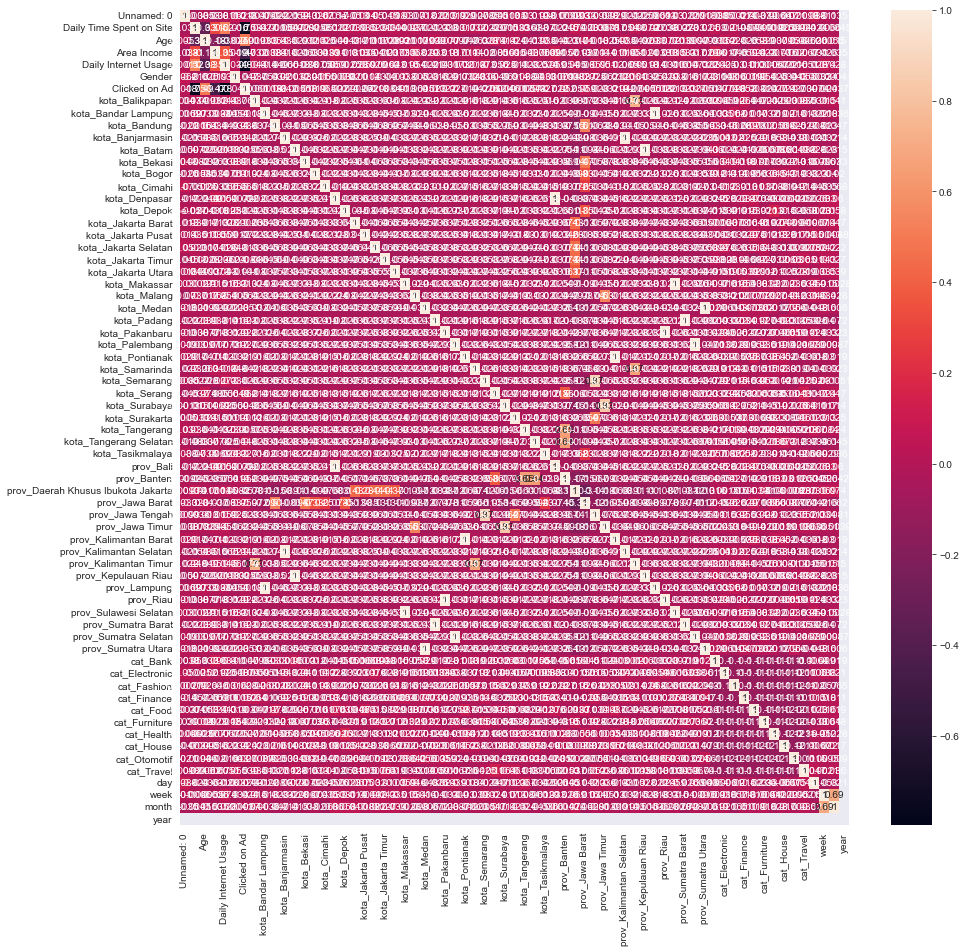

In [67]:
plt.figure(figsize=(15,15))
sns.heatmap(df_iqr.corr(),annot=True)
plt.show()

In [68]:
df_iqr.columns

Index(['Unnamed: 0', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Gender', 'Timestamp', 'Clicked on Ad', 'city',
       'province', 'category', 'kota_Balikpapan', 'kota_Bandar Lampung',
       'kota_Bandung', 'kota_Banjarmasin', 'kota_Batam', 'kota_Bekasi',
       'kota_Bogor', 'kota_Cimahi', 'kota_Denpasar', 'kota_Depok',
       'kota_Jakarta Barat', 'kota_Jakarta Pusat', 'kota_Jakarta Selatan',
       'kota_Jakarta Timur', 'kota_Jakarta Utara', 'kota_Makassar',
       'kota_Malang', 'kota_Medan', 'kota_Padang', 'kota_Pakanbaru',
       'kota_Palembang', 'kota_Pontianak', 'kota_Samarinda', 'kota_Semarang',
       'kota_Serang', 'kota_Surabaya', 'kota_Surakarta', 'kota_Tangerang',
       'kota_Tangerang Selatan', 'kota_Tasikmalaya', 'prov_Bali',
       'prov_Banten', 'prov_Daerah Khusus Ibukota Jakarta', 'prov_Jawa Barat',
       'prov_Jawa Tengah', 'prov_Jawa Timur', 'prov_Kalimantan Barat',
       'prov_Kalimantan Selatan', 'prov_Kalimantan Timur'

### b. Dimensionality Reduction

In [69]:
df_red = df_iqr.drop(['Unnamed: 0','Timestamp','city',
       'province', 'category'],axis=1) 

In [70]:
df_red

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Gender  \
0                       68.95   35  432837300.0                256.09       0   
1                       80.23   31  479092950.0                193.77       1   
2                       69.47   26  418501580.0                236.50       0   
3                       74.15   29  383643260.0                245.89       1   
4                       68.37   35  517229930.0                225.58       0   
..                        ...  ...          ...                   ...     ...   
994                     43.70   28  441888720.0                173.01       0   
995                     72.97   30  499691990.0                208.58       1   
996                     51.30   45  474475190.0                134.42       1   
998                     55.55   19  293445530.0                187.95       0   
999                     45.01   26  209130600.0                178.35       0   

     Clicked on Ad  kota_Balikpapan  kota_Bandar Lampung  kota_Bandung  \
0                0                0                    0             0   
1                0                0                    0             0   
2                0                0                    0             0   
3                0                0                    0             0   
4                0                0                    0             0   
..             ...              ...                  ...           ...   
994              1                0                    0             0   
995              1                0                    0             0   
996              1                0                    0             0   
998              0                0                    0             0   
999              1                0                    0             0   

     kota_Banjarmasin  ...  cat_Food  cat_Furniture  cat_Health  cat_House  \
0                   0  ...         0              1           0          0   
1                   0  ...         1              0           0          0   
2                   0  ...         0              0           0          0   
3                   0  ...         0              0           0          1   
4                   0  ...         0              0           0          0   
..                ...  ...       ...            ...         ...        ...   
994                 0  ...         0              0           0          0   
995                 0  ...         0              0           0          0   
996                 0  ...         0              0           0          0   
998                 0  ...         0              0           0          0   
999                 0  ...         0              0           0          0   

     cat_Otomotif  cat_Travel  day  week  month  year  
0               0           0   27    12      3  2016  
1               0           0    4    14      4  2016  
2               0           0   13    10      3  2016  
3               0           0   10     1      1  2016  
4               0           0    3    22      6  2016  
..            ...         ...  ...   ...    ...   ...  
994             0           0    4    14      4  2016  
995             0           0   11     6      2  2016  
996             0           0   22    16      4  2016  
998             0           0   24    12      3  2016  
999             0           1    3    22      6  2016  

[955 rows x 66 columns]

## 2.4 Data Imputation

## 2.5 Data Balancing

In [71]:
df_red['Clicked on Ad'].value_counts()

0    478
1    477
Name: Clicked on Ad, dtype: int64

## 2.6 Data  Augmentation

## 2.7 Splitting Data

In [72]:
df_red

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Gender  \
0                       68.95   35  432837300.0                256.09       0   
1                       80.23   31  479092950.0                193.77       1   
2                       69.47   26  418501580.0                236.50       0   
3                       74.15   29  383643260.0                245.89       1   
4                       68.37   35  517229930.0                225.58       0   
..                        ...  ...          ...                   ...     ...   
994                     43.70   28  441888720.0                173.01       0   
995                     72.97   30  499691990.0                208.58       1   
996                     51.30   45  474475190.0                134.42       1   
998                     55.55   19  293445530.0                187.95       0   
999                     45.01   26  209130600.0                178.35       0   

     Clicked on Ad  kota_Balikpapan  kota_Bandar Lampung  kota_Bandung  \
0                0                0                    0             0   
1                0                0                    0             0   
2                0                0                    0             0   
3                0                0                    0             0   
4                0                0                    0             0   
..             ...              ...                  ...           ...   
994              1                0                    0             0   
995              1                0                    0             0   
996              1                0                    0             0   
998              0                0                    0             0   
999              1                0                    0             0   

     kota_Banjarmasin  ...  cat_Food  cat_Furniture  cat_Health  cat_House  \
0                   0  ...         0              1           0          0   
1                   0  ...         1              0           0          0   
2                   0  ...         0              0           0          0   
3                   0  ...         0              0           0          1   
4                   0  ...         0              0           0          0   
..                ...  ...       ...            ...         ...        ...   
994                 0  ...         0              0           0          0   
995                 0  ...         0              0           0          0   
996                 0  ...         0              0           0          0   
998                 0  ...         0              0           0          0   
999                 0  ...         0              0           0          0   

     cat_Otomotif  cat_Travel  day  week  month  year  
0               0           0   27    12      3  2016  
1               0           0    4    14      4  2016  
2               0           0   13    10      3  2016  
3               0           0   10     1      1  2016  
4               0           0    3    22      6  2016  
..            ...         ...  ...   ...    ...   ...  
994             0           0    4    14      4  2016  
995             0           0   11     6      2  2016  
996             0           0   22    16      4  2016  
998             0           0   24    12      3  2016  
999             0           1    3    22      6  2016  

[955 rows x 66 columns]

In [73]:
df_red.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Gender', 'Clicked on Ad', 'kota_Balikpapan',
       'kota_Bandar Lampung', 'kota_Bandung', 'kota_Banjarmasin', 'kota_Batam',
       'kota_Bekasi', 'kota_Bogor', 'kota_Cimahi', 'kota_Denpasar',
       'kota_Depok', 'kota_Jakarta Barat', 'kota_Jakarta Pusat',
       'kota_Jakarta Selatan', 'kota_Jakarta Timur', 'kota_Jakarta Utara',
       'kota_Makassar', 'kota_Malang', 'kota_Medan', 'kota_Padang',
       'kota_Pakanbaru', 'kota_Palembang', 'kota_Pontianak', 'kota_Samarinda',
       'kota_Semarang', 'kota_Serang', 'kota_Surabaya', 'kota_Surakarta',
       'kota_Tangerang', 'kota_Tangerang Selatan', 'kota_Tasikmalaya',
       'prov_Bali', 'prov_Banten', 'prov_Daerah Khusus Ibukota Jakarta',
       'prov_Jawa Barat', 'prov_Jawa Tengah', 'prov_Jawa Timur',
       'prov_Kalimantan Barat', 'prov_Kalimantan Selatan',
       'prov_Kalimantan Timur', 'prov_Kepulauan Riau', 'prov_Lampung',
       'prov_Riau'

In [74]:
df_norm = df_red

In [75]:
# from sklearn.preprocessing import StandardScaler as ss

# kolom = ['Daily Time Spent on Site', 'Age', 'Area Income',
#        'Daily Internet Usage', 'Gender', 'Clicked on Ad', 'kota_Balikpapan',
#        'kota_Bandar Lampung', 'kota_Bandung', 'kota_Banjarmasin', 'kota_Batam',
#        'kota_Bekasi', 'kota_Bogor', 'kota_Cimahi', 'kota_Denpasar',
#        'kota_Depok', 'kota_Jakarta Barat', 'kota_Jakarta Pusat',
#        'kota_Jakarta Selatan', 'kota_Jakarta Timur', 'kota_Jakarta Utara',
#        'kota_Makassar', 'kota_Malang', 'kota_Medan', 'kota_Padang',
#        'kota_Pakanbaru', 'kota_Palembang', 'kota_Pontianak', 'kota_Samarinda',
#        'kota_Semarang', 'kota_Serang', 'kota_Surabaya', 'kota_Surakarta',
#        'kota_Tangerang', 'kota_Tangerang Selatan', 'kota_Tasikmalaya',
#        'prov_Bali', 'prov_Banten', 'prov_Daerah Khusus Ibukota Jakarta',
#        'prov_Jawa Barat', 'prov_Jawa Tengah', 'prov_Jawa Timur',
#        'prov_Kalimantan Barat', 'prov_Kalimantan Selatan',
#        'prov_Kalimantan Timur', 'prov_Kepulauan Riau', 'prov_Lampung',
#        'prov_Riau', 'prov_Sulawesi Selatan', 'prov_Sumatra Barat',
#        'prov_Sumatra Selatan', 'prov_Sumatra Utara', 'cat_Bank',
#        'cat_Electronic', 'cat_Fashion', 'cat_Finance', 'cat_Food',
#        'cat_Furniture', 'cat_Health', 'cat_House', 'cat_Otomotif',
#        'cat_Travel', 'day', 'week', 'month', 'year']

# for i in kolom:
#     df_norm[i] = ss().fit_transform(df_norm[i].values.reshape(len(df_norm),1))

In [76]:
df_red

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Gender  \
0                       68.95   35  432837300.0                256.09       0   
1                       80.23   31  479092950.0                193.77       1   
2                       69.47   26  418501580.0                236.50       0   
3                       74.15   29  383643260.0                245.89       1   
4                       68.37   35  517229930.0                225.58       0   
..                        ...  ...          ...                   ...     ...   
994                     43.70   28  441888720.0                173.01       0   
995                     72.97   30  499691990.0                208.58       1   
996                     51.30   45  474475190.0                134.42       1   
998                     55.55   19  293445530.0                187.95       0   
999                     45.01   26  209130600.0                178.35       0   

     Clicked on Ad  kota_Balikpapan  kota_Bandar Lampung  kota_Bandung  \
0                0                0                    0             0   
1                0                0                    0             0   
2                0                0                    0             0   
3                0                0                    0             0   
4                0                0                    0             0   
..             ...              ...                  ...           ...   
994              1                0                    0             0   
995              1                0                    0             0   
996              1                0                    0             0   
998              0                0                    0             0   
999              1                0                    0             0   

     kota_Banjarmasin  ...  cat_Food  cat_Furniture  cat_Health  cat_House  \
0                   0  ...         0              1           0          0   
1                   0  ...         1              0           0          0   
2                   0  ...         0              0           0          0   
3                   0  ...         0              0           0          1   
4                   0  ...         0              0           0          0   
..                ...  ...       ...            ...         ...        ...   
994                 0  ...         0              0           0          0   
995                 0  ...         0              0           0          0   
996                 0  ...         0              0           0          0   
998                 0  ...         0              0           0          0   
999                 0  ...         0              0           0          0   

     cat_Otomotif  cat_Travel  day  week  month  year  
0               0           0   27    12      3  2016  
1               0           0    4    14      4  2016  
2               0           0   13    10      3  2016  
3               0           0   10     1      1  2016  
4               0           0    3    22      6  2016  
..            ...         ...  ...   ...    ...   ...  
994             0           0    4    14      4  2016  
995             0           0   11     6      2  2016  
996             0           0   22    16      4  2016  
998             0           0   24    12      3  2016  
999             0           1    3    22      6  2016  

[955 rows x 66 columns]

### a. Data Splitting

In [77]:
#tanpa normalisasi

In [78]:
X1 = df_red.drop(['Clicked on Ad'], axis=1)
y1 = df_red[['Clicked on Ad']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=123)

In [79]:
y_train1.value_counts()

Clicked on Ad
0                337
1                331
dtype: int64

In [80]:
#setelah normalisasi

In [81]:
from sklearn.preprocessing import StandardScaler as ss

kolom = ['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Gender', 'kota_Balikpapan',
       'kota_Bandar Lampung', 'kota_Bandung', 'kota_Banjarmasin', 'kota_Batam',
       'kota_Bekasi', 'kota_Bogor', 'kota_Cimahi', 'kota_Denpasar',
       'kota_Depok', 'kota_Jakarta Barat', 'kota_Jakarta Pusat',
       'kota_Jakarta Selatan', 'kota_Jakarta Timur', 'kota_Jakarta Utara',
       'kota_Makassar', 'kota_Malang', 'kota_Medan', 'kota_Padang',
       'kota_Pakanbaru', 'kota_Palembang', 'kota_Pontianak', 'kota_Samarinda',
       'kota_Semarang', 'kota_Serang', 'kota_Surabaya', 'kota_Surakarta',
       'kota_Tangerang', 'kota_Tangerang Selatan', 'kota_Tasikmalaya',
       'prov_Bali', 'prov_Banten', 'prov_Daerah Khusus Ibukota Jakarta',
       'prov_Jawa Barat', 'prov_Jawa Tengah', 'prov_Jawa Timur',
       'prov_Kalimantan Barat', 'prov_Kalimantan Selatan',
       'prov_Kalimantan Timur', 'prov_Kepulauan Riau', 'prov_Lampung',
       'prov_Riau', 'prov_Sulawesi Selatan', 'prov_Sumatra Barat',
       'prov_Sumatra Selatan', 'prov_Sumatra Utara', 'cat_Bank',
       'cat_Electronic', 'cat_Fashion', 'cat_Finance', 'cat_Food',
       'cat_Furniture', 'cat_Health', 'cat_House', 'cat_Otomotif',
       'cat_Travel', 'day', 'week', 'month', 'year']

for i in kolom:
    df_norm[i] = ss().fit_transform(df_norm[i].values.reshape(len(df_norm),1))

In [82]:
X2 = df_norm.drop(['Clicked on Ad'], axis=1)
y2 = df_norm[['Clicked on Ad']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=123)

In [83]:
y_train2.value_counts()

Clicked on Ad
0                337
1                331
dtype: int64

In [84]:
df_norm['year'].unique()

array([0.])

In [85]:
df_norm

Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
0                    0.256123 -0.116581     0.495769              1.737039   
1                    0.964034 -0.572403     1.005425              0.319974   
2                    0.288757 -1.142181     0.337815              1.291591   
3                    0.582465 -0.800314    -0.046263              1.505106   
4                    0.219723 -0.116581     1.425627              1.043287   
..                        ...       ...          ...                   ...   
994                 -1.328519 -0.914270     0.595500             -0.152077   
995                  0.508410 -0.686358     1.232390              0.656732   
996                 -0.851557  1.022975     0.954545             -1.029556   
998                 -0.584836 -1.939869    -1.040083              0.187636   
999                 -1.246306 -1.142181    -1.969085             -0.030653   

       Gender  Clicked on Ad  kota_Balikpapan  kota_Bandar Lampung  \
0   -0.953939              0        -0.138601            -0.173796   
1    1.048285              0        -0.138601            -0.173796   
2   -0.953939              0        -0.138601            -0.173796   
3    1.048285              0        -0.138601            -0.173796   
4   -0.953939              0        -0.138601            -0.173796   
..        ...            ...              ...                  ...   
994 -0.953939              1        -0.138601            -0.173796   
995  1.048285              1        -0.138601            -0.173796   
996  1.048285              1        -0.138601            -0.173796   
998 -0.953939              0        -0.138601            -0.173796   
999 -0.953939              1        -0.138601            -0.173796   

     kota_Bandung  kota_Banjarmasin  ...  cat_Food  cat_Furniture  cat_Health  \
0       -0.265759         -0.153557  ... -0.336234       2.974115   -0.341993   
1       -0.265759         -0.153557  ...  2.974115      -0.336234   -0.341993   
2       -0.265759         -0.153557  ... -0.336234      -0.336234   -0.341993   
3       -0.265759         -0.153557  ... -0.336234      -0.336234   -0.341993   
4       -0.265759         -0.153557  ... -0.336234      -0.336234   -0.341993   
..            ...               ...  ...       ...            ...         ...   
994     -0.265759         -0.153557  ... -0.336234      -0.336234   -0.341993   
995     -0.265759         -0.153557  ... -0.336234      -0.336234   -0.341993   
996     -0.265759         -0.153557  ... -0.336234      -0.336234   -0.341993   
998     -0.265759         -0.153557  ... -0.336234      -0.336234   -0.341993   
999     -0.265759         -0.153557  ... -0.336234      -0.336234   -0.341993   

     cat_House  cat_Otomotif  cat_Travel       day      week     month  year  
0    -0.347695     -0.357084   -0.320580  1.330035 -0.354028 -0.424404   0.0  
1    -0.347695     -0.357084   -0.320580 -1.309248 -0.148996  0.095219   0.0  
2    -0.347695     -0.357084   -0.320580 -0.276485 -0.559059 -0.424404   0.0  
3     2.876081     -0.357084   -0.320580 -0.620739 -1.481699 -1.463650   0.0  
4    -0.347695     -0.357084   -0.320580 -1.423999  0.671128  1.134465   0.0  
..         ...           ...         ...       ...       ...       ...   ...  
994  -0.347695     -0.357084   -0.320580 -1.309248 -0.148996  0.095219   0.0  
995  -0.347695     -0.357084   -0.320580 -0.505988 -0.969121 -0.944027   0.0  
996  -0.347695     -0.357084   -0.320580  0.756278  0.056035  0.095219   0.0  
998  -0.347695     -0.357084   -0.320580  0.985781 -0.354028 -0.424404   0.0  
999  -0.347695     -0.357084    3.119349 -1.423999  0.671128  1.134465   0.0  

[955 rows x 66 columns]

#### 

### b. Modelling

### Model 1

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [87]:
# Initialize model and fit to training data
lr1 = LogisticRegression(random_state=42)
lr1.fit(X_train1, y_train1)

# Predict using test set
y_pred1 = lr1.predict(X_test1)

# Evaluate model using accuracy score
accuracy2 = accuracy_score(y_test1, y_pred1)
print('Accuracy:', accuracy2)

Accuracy: 0.4912891986062718


In [88]:
# Evaluasi model menggunakan confusion matrix dan accuracy score
cm1 = confusion_matrix(y_test1, y_pred1)
accuracy2 = accuracy_score(y_test1, y_pred1)

print("Confusion matrix: \n", cm1)
print("Accuracy score: ", accuracy2)

Confusion matrix: 
 [[141   0]
 [146   0]]
Accuracy score:  0.4912891986062718


In [89]:
# Get feature importances
importances1 = abs(lr1.coef_[0])

# Print feature importances
for i, feature in enumerate(X_train1.columns):
    print("{}: {}".format(feature, importances1[i]))

Daily Time Spent on Site: 3.4582840898709454e-16
Age: 3.6315469380910224e-16
Area Income: 5.624856726362819e-10
Daily Internet Usage: 1.106021509064609e-15
Gender: 6.802057803966514e-19
kota_Balikpapan: 9.960737373525711e-21
kota_Bandar Lampung: 1.404167085481045e-19
kota_Bandung: 7.155953557396682e-19
kota_Banjarmasin: 5.564203602321157e-19
kota_Batam: 1.282361826762785e-19
kota_Bekasi: 2.1344370072979667e-19
kota_Bogor: 9.842775956582848e-20
kota_Cimahi: 4.541543470447095e-19
kota_Denpasar: 5.339766767363019e-20
kota_Depok: 1.2282618818978621e-19
kota_Jakarta Barat: 1.3284352114954617e-19
kota_Jakarta Pusat: 5.707776420213052e-19
kota_Jakarta Selatan: 1.6589539372777207e-19
kota_Jakarta Timur: 2.0427350964975867e-19
kota_Jakarta Utara: 1.1372825498556197e-19
kota_Makassar: 3.721563782546877e-19
kota_Malang: 3.2075980440955877e-19
kota_Medan: 2.196729451252047e-19
kota_Padang: 3.952414632607654e-19
kota_Pakanbaru: 8.533523263926021e-20
kota_Palembang: 5.067202915560557e-19
kota_Pontia

### XGBOOST

In [90]:
from xgboost import XGBClassifier
import xgboost as xgb

In [91]:
# Train XGBoost model
xgb1 = xgb.XGBClassifier()
xgb1.fit(X_train1, y_train1)

# Predict using test set
y_pred2 = xgb1.predict(X_test1)

# Evaluate model using accuracy score
accuracy3 = accuracy_score(y_test1, y_pred2)
print('Accuracy:', accuracy3)

Accuracy: 0.9721254355400697


In [92]:
# Evaluasi model menggunakan confusion matrix dan accuracy score
cm2 = confusion_matrix(y_test1, y_pred2)
accuracy3 = accuracy_score(y_test1, y_pred2)

print("Confusion matrix: \n", cm2)
print("Accuracy score: ", accuracy3)

Confusion matrix: 
 [[140   1]
 [  7 139]]
Accuracy score:  0.9721254355400697


In [93]:
# Get feature importances
importances2 = xgb1.feature_importances_

# Print feature importances
for i, feature in enumerate(X_train1.columns):
    print("{}: {}".format(feature, importances2[i]))

Daily Time Spent on Site: 0.16571830213069916
Age: 0.034031324088573456
Area Income: 0.035727038979530334
Daily Internet Usage: 0.42977890372276306
Gender: 0.019688814878463745
kota_Balikpapan: 0.0
kota_Bandar Lampung: 0.0
kota_Bandung: 0.0
kota_Banjarmasin: 0.0
kota_Batam: 0.0
kota_Bekasi: 0.0
kota_Bogor: 0.0
kota_Cimahi: 0.0
kota_Denpasar: 0.0
kota_Depok: 0.0
kota_Jakarta Barat: 0.0
kota_Jakarta Pusat: 0.0
kota_Jakarta Selatan: 0.0313442163169384
kota_Jakarta Timur: 0.0
kota_Jakarta Utara: 0.0
kota_Makassar: 0.0
kota_Malang: 0.0
kota_Medan: 0.0
kota_Padang: 0.0
kota_Pakanbaru: 0.0
kota_Palembang: 0.030968982726335526
kota_Pontianak: 0.0
kota_Samarinda: 0.0
kota_Semarang: 0.036571353673934937
kota_Serang: 0.0
kota_Surabaya: 0.0
kota_Surakarta: 0.0
kota_Tangerang: 0.0
kota_Tangerang Selatan: 0.0
kota_Tasikmalaya: 0.0
prov_Bali: 0.0
prov_Banten: 0.0
prov_Daerah Khusus Ibukota Jakarta: 0.022137215360999107
prov_Jawa Barat: 0.0
prov_Jawa Tengah: 0.03411461412906647
prov_Jawa Timur: 0.0
pr

### Model 2

In [94]:
# Initialize model and fit to training data
lr2 = LogisticRegression(random_state=42)
lr2.fit(X_train2, y_train2)

# Predict using test set
y_pred3 = lr2.predict(X_test2)

# Evaluate model using accuracy score
accuracy4 = accuracy_score(y_test2, y_pred3)
print('Accuracy:', accuracy4)

Accuracy: 0.9721254355400697


In [95]:
# Evaluasi model menggunakan confusion matrix dan accuracy score
cm2 = confusion_matrix(y_test2, y_pred3)
accuracy4 = accuracy_score(y_test2, y_pred3)

print("Confusion matrix: \n", cm2)
print("Accuracy score: ", accuracy4)

Confusion matrix: 
 [[140   1]
 [  7 139]]
Accuracy score:  0.9721254355400697


In [96]:
# Get feature importances
importances3 = abs(lr2.coef_[0])

# Print feature importances
for i, feature in enumerate(X_train2.columns):
    print("{}: {}".format(feature, importances3[i]))

Daily Time Spent on Site: 2.5633969922733435
Age: 1.3033241913758358
Area Income: 1.440948387261128
Daily Internet Usage: 3.0473028987361355
Gender: 0.19815069681694458
kota_Balikpapan: 0.09957167836948537
kota_Bandar Lampung: 0.1010418103828512
kota_Bandung: 0.04198597064786634
kota_Banjarmasin: 0.0033784482102866683
kota_Batam: 0.03550757603830484
kota_Bekasi: 0.048277169551009136
kota_Bogor: 0.012767361263592394
kota_Cimahi: 0.1843308792472865
kota_Denpasar: 0.0010899620210899066
kota_Depok: 0.2966628416277596
kota_Jakarta Barat: 0.16258031908665077
kota_Jakarta Pusat: 0.5022231875267152
kota_Jakarta Selatan: 0.3841104149667054
kota_Jakarta Timur: 0.1951229224681756
kota_Jakarta Utara: 0.03831315171810345
kota_Makassar: 0.0373340754105372
kota_Malang: 0.10619860773509227
kota_Medan: 0.04365371432351968
kota_Padang: 0.001700078806142309
kota_Pakanbaru: 0.05847670197868693
kota_Palembang: 0.1149019614652168
kota_Pontianak: 0.041794309876962144
kota_Samarinda: 0.03416734806463296
kota_

### xgb 2

In [97]:
from xgboost import XGBClassifier
import xgboost as xgb

In [98]:
# Train XGBoost model
xgb2 = xgb.XGBClassifier()
xgb2.fit(X_train2, y_train2)

# Predict using test set
y_pred4 = xgb2.predict(X_test2)

# Evaluate model using accuracy score
accuracy5 = accuracy_score(y_test2, y_pred4)
print('Accuracy:', accuracy5)

Accuracy: 0.9721254355400697


In [99]:
# Evaluasi model menggunakan confusion matrix dan accuracy score
cm3 = confusion_matrix(y_test2, y_pred4)
accuracy5 = accuracy_score(y_test2, y_pred4)

print("Confusion matrix: \n", cm3)
print("Accuracy score: ", accuracy5)

Confusion matrix: 
 [[140   1]
 [  7 139]]
Accuracy score:  0.9721254355400697


In [100]:
# Get feature importances
importances4 = xgb2.feature_importances_

# Print feature importances
for i, feature in enumerate(X_train2.columns):
    print("{}: {}".format(feature, importances4[i]))

Daily Time Spent on Site: 0.16571830213069916
Age: 0.034031324088573456
Area Income: 0.035727038979530334
Daily Internet Usage: 0.42977890372276306
Gender: 0.019688814878463745
kota_Balikpapan: 0.0
kota_Bandar Lampung: 0.0
kota_Bandung: 0.0
kota_Banjarmasin: 0.0
kota_Batam: 0.0
kota_Bekasi: 0.0
kota_Bogor: 0.0
kota_Cimahi: 0.0
kota_Denpasar: 0.0
kota_Depok: 0.0
kota_Jakarta Barat: 0.0
kota_Jakarta Pusat: 0.0
kota_Jakarta Selatan: 0.0313442163169384
kota_Jakarta Timur: 0.0
kota_Jakarta Utara: 0.0
kota_Makassar: 0.0
kota_Malang: 0.0
kota_Medan: 0.0
kota_Padang: 0.0
kota_Pakanbaru: 0.0
kota_Palembang: 0.030968982726335526
kota_Pontianak: 0.0
kota_Samarinda: 0.0
kota_Semarang: 0.036571353673934937
kota_Serang: 0.0
kota_Surabaya: 0.0
kota_Surakarta: 0.0
kota_Tangerang: 0.0
kota_Tangerang Selatan: 0.0
kota_Tasikmalaya: 0.0
prov_Bali: 0.0
prov_Banten: 0.0
prov_Daerah Khusus Ibukota Jakarta: 0.022137215360999107
prov_Jawa Barat: 0.0
prov_Jawa Tengah: 0.03411461412906647
prov_Jawa Timur: 0.0
pr

In [101]:
#Percobaan 1 Tanpa Normalisasi

In [102]:
# # Create function to fit model & model evaluation
# def fit_evaluation(Model1, X_train1, y_train1, X_test1, y_test1):
#     model = Model1 # initiate model
#     model.fit(X_train1, y_train1) # fit the model
#     y_pred1 = model.predict(X_test1)
#     y_pred_train1 = model.predict(X_train1)
#     y_pred_proba1 = model.predict_proba(X_test1)
#     y_pred_proba_train1 = model.predict_proba(X_train1)
#     train_score1 = model.score(X_train1, y_train1) 
#     test_score1 = model.score(X_test1, y_test1)
#     score1 = cross_validate(model, X1, y1, cv=5, scoring='roc_auc', return_train_score=True) # Cross Validate
#     return round(test_score1,2), round(precision_score(y_test1, y_pred1),2), \
#            round(precision_score(y_train1, y_pred_train1),2),round(recall_score(y_test1, y_pred1),2), \
#            round(f1_score(y_test1, y_pred1),2), round(roc_auc_score(y_test1, y_pred_proba1[:, 1]),2), \
#            round(roc_auc_score(y_train1, y_pred_proba_train1[:, 1]),2), round((score1['test_score'].mean()),2), \
#            round((score1['train_score'].mean()),2)

In [103]:
# # Inititate algorithm
# lr = LogisticRegression(random_state=42)
# dt = DecisionTreeClassifier(random_state=42)
# xgb = XGBClassifier(random_state=42, eval_metric = 'logloss')
# knn = KNeighborsClassifier(n_neighbors=5)
# ab = AdaBoostClassifier(random_state=42)
# rf = RandomForestClassifier(random_state=42)
# clf = GaussianNB()


# # Create function to make the result as dataframe 
# def model_comparison_default(X1,y1): 
    
#     # Logistic Regression
#     lr_test_score, lrte_pr, lrtr_pr, lr_re, lr_f1, lrte_roc_auc, lrtr_roc_auc, lrte_roc_auc_cv, lrtr_roc_auc_cv = fit_evaluation(
#         lr, X_train1, y_train1, X_test1, y_test1)
#     # Decision Tree
#     dt_test_score, dtte_pr, dttr_pr, dt_re, dt_f1, dtte_roc_auc, dttr_roc_auc, dtte_roc_auc_cv, dttr_roc_auc_cv = fit_evaluation(
#         dt, X_train1, y_train1, X_test1, y_test1)
#     # XGBoost
#     xgb_test_score, xgbte_pr, xgbtr_pr, xgb_re, xgb_f1, xgbte_roc_auc, xgbtr_roc_auc, xgbte_roc_auc_cv, xgbtr_roc_auc_cv = fit_evaluation(
#         xgb, X_train1, y_train1, X_test1, y_test1)
#     # KNN
#     knn_test_score, knnte_pr, knntr_pr, knn_re, knn_f1, knnte_roc_auc, knntr_roc_auc, knnte_roc_auc_cv, knntr_roc_auc_cv = fit_evaluation(
#         knn, X_train1, y_train1, X_test1, y_test1)
#     # AdaBoost
#     ab_test_score, abte_pr, abtr_pr, ab_re, ab_f1, abte_roc_auc, abtr_roc_auc, abte_roc_auc_cv, abtr_roc_auc_cv = fit_evaluation(
#         ab, X_train1, y_train1, X_test1, y_test1)
#     # Random Forest
#     rf_test_score, rfte_pr, rftr_pr, rf_re, rf_f1, rfte_roc_auc, rftr_roc_auc, rfte_roc_auc_cv, rftr_roc_auc_cv = fit_evaluation(
#         rf, X_train1, y_train1, X_test1, y_test1)
#     # Naive Bayes
#     clf_test_score, clfte_pr, clftr_pr, clf_re, clf_f1, clfte_roc_auc, clftr_roc_auc, clfte_roc_auc_cv, clftr_roc_auc_cv = fit_evaluation(
#         clf, X_train1, y_train1, X_test1, y_test1)
    
    
    
#     models1 = ['Logistic Regression','Decision Tree','XGBoost','KNN','AdaBoost',
#               'Random Forest','Naive Bayes']
#     test_score1 = [lr_test_score, dt_test_score, xgb_test_score,
#                   knn_test_score, ab_test_score, rf_test_score, clf_test_score]
#     precision_test1 = [lrte_pr, dtte_pr, xgbte_pr, knnte_pr, abte_pr, rfte_pr, clfte_pr]
#     precision_train1 = [lrtr_pr, dttr_pr, xgbtr_pr, knntr_pr, abtr_pr, rftr_pr, clftr_pr]
#     recall1 = [lr_re, dt_re, xgb_re, knn_re, ab_re, rf_re, clf_re]
#     f11 = [lr_f1, dt_f1, xgb_f1, knn_f1, ab_f1, rf_f1, clf_f1]
#     roc_auc_test1 = [lrte_roc_auc, dtte_roc_auc, xgbte_roc_auc, knnte_roc_auc, abte_roc_auc, rfte_roc_auc, clfte_roc_auc]
#     roc_auc_train1 = [lrtr_roc_auc, dttr_roc_auc, xgbtr_roc_auc, knntr_roc_auc, abtr_roc_auc, rftr_roc_auc, clftr_roc_auc]
#     roc_auc_test_cv1 = [lrte_roc_auc_cv, dtte_roc_auc_cv, xgbte_roc_auc_cv, knnte_roc_auc_cv, abte_roc_auc_cv, rfte_roc_auc_cv, clfte_roc_auc_cv]
#     roc_auc_train_cv1 = [lrtr_roc_auc_cv, dttr_roc_auc_cv, xgbtr_roc_auc_cv, knntr_roc_auc_cv, abtr_roc_auc_cv, rftr_roc_auc_cv, clftr_roc_auc_cv]
    
#     model_comparison1 = pd.DataFrame(data=[models1, test_score1, 
#                                           precision_test1, precision_train1, recall1,
#                                           f11, roc_auc_test1, roc_auc_train1,
#                                           roc_auc_test_cv1, roc_auc_train_cv1]).T.rename({0: 'Model',
#                                                                                         1: 'Accuracy',
#                                                                                         2: 'Precision_Test',
#                                                                                         3: 'Precision_Train',
#                                                                                         4: 'Recall',
#                                                                                         5: 'F1 Score',
#                                                                                         6: 'ROC_AUC_Test',
#                                                                                         7: 'ROC_AUC_Train',
#                                                                                         8: 'ROC_AUC_Test_CV',
#                                                                                         9: 'ROC_AUC_Train_CV'
#                                                                                                               }, axis=1)
    
#     return model_comparison1

In [104]:
# model_comparison_default(X1, y1)

In [105]:
#Percobaan 2 dengan Normalisasi

In [106]:
# # Create function to fit model & model evaluation
# def fit_evaluation2(Model2, X_train2, y_train2, X_test2, y_test2):
#     model = Model2 # initiate model
#     model.fit(X_train2, y_train2) # fit the model
#     y_pred2 = model.predict(X_test2)
#     y_pred_train2 = model.predict(X_train2)
#     y_pred_proba2 = model.predict_proba(X_test2)
#     y_pred_proba_train2 = model.predict_proba(X_train2)
#     train_score2 = model.score(X_train2, y_train2) 
#     test_score2 = model.score(X_test2, y_test2)
#     score2 = cross_validate(model, X2, y2, cv=5, scoring='roc_auc', return_train_score=True) # Cross Validate
#     return round(test_score2,2), round(precision_score(y_test2, y_pred2),2), \
#            round(precision_score(y_train2, y_pred_train2),2),round(recall_score(y_test2, y_pred2),2), \
#            round(f1_score(y_test2, y_pred2),2), round(roc_auc_score(y_test2, y_pred_proba2[:, 1]),2), \
#            round(roc_auc_score(y_train2, y_pred_proba_train2[:, 1]),2), round((score2['test_score'].mean()),2), \
#            round((score2['train_score'].mean()),2)

In [107]:
# # Inititate algorithm
# lr = LogisticRegression(random_state=42)
# dt = DecisionTreeClassifier(random_state=42)
# xgb = XGBClassifier(random_state=42, eval_metric = 'logloss')
# knn = KNeighborsClassifier(n_neighbors=5)
# ab = AdaBoostClassifier(random_state=42)
# rf = RandomForestClassifier(random_state=42)
# clf = GaussianNB()


# # Create function to make the result as dataframe 
# def model_comparison_default2(X2,y2): 
    
#     # Logistic Regression
#     lr_test_score, lrte_pr, lrtr_pr, lr_re, lr_f1, lrte_roc_auc, lrtr_roc_auc, lrte_roc_auc_cv, lrtr_roc_auc_cv = fit_evaluation(
#         lr, X_train2, y_train2, X_test2, y_test2)
#     # Decision Tree
#     dt_test_score, dtte_pr, dttr_pr, dt_re, dt_f1, dtte_roc_auc, dttr_roc_auc, dtte_roc_auc_cv, dttr_roc_auc_cv = fit_evaluation(
#         dt, X_train2, y_train2, X_test2, y_test2)
#     # XGBoost
#     xgb_test_score, xgbte_pr, xgbtr_pr, xgb_re, xgb_f1, xgbte_roc_auc, xgbtr_roc_auc, xgbte_roc_auc_cv, xgbtr_roc_auc_cv = fit_evaluation(
#         xgb, X_train2, y_train2, X_test2, y_test2)
#     # KNN
#     knn_test_score, knnte_pr, knntr_pr, knn_re, knn_f1, knnte_roc_auc, knntr_roc_auc, knnte_roc_auc_cv, knntr_roc_auc_cv = fit_evaluation(
#         knn, X_train2, y_train2, X_test2, y_test2)
#     # AdaBoost
#     ab_test_score, abte_pr, abtr_pr, ab_re, ab_f1, abte_roc_auc, abtr_roc_auc, abte_roc_auc_cv, abtr_roc_auc_cv = fit_evaluation(
#         ab, X_train2, y_train2, X_test2, y_test2)
#     # Random Forest
#     rf_test_score, rfte_pr, rftr_pr, rf_re, rf_f1, rfte_roc_auc, rftr_roc_auc, rfte_roc_auc_cv, rftr_roc_auc_cv = fit_evaluation(
#         rf, X_train2, y_train2, X_test2, y_test2)
#     # Naive Bayes
#     clf_test_score, clfte_pr, clftr_pr, clf_re, clf_f1, clfte_roc_auc, clftr_roc_auc, clfte_roc_auc_cv, clftr_roc_auc_cv = fit_evaluation(
#         clf, X_train2, y_train2, X_test2, y_test2)
    
    
    
#     models2 = ['Logistic Regression','Decision Tree','XGBoost','KNN','AdaBoost',
#               'Random Forest','Naive Bayes']
#     test_score2 = [lr_test_score, dt_test_score, xgb_test_score,
#                   knn_test_score, ab_test_score, rf_test_score, clf_test_score]
#     precision_test2 = [lrte_pr, dtte_pr, xgbte_pr, knnte_pr, abte_pr, rfte_pr, clfte_pr]
#     precision_train2 = [lrtr_pr, dttr_pr, xgbtr_pr, knntr_pr, abtr_pr, rftr_pr, clftr_pr]
#     recall2 = [lr_re, dt_re, xgb_re, knn_re, ab_re, rf_re, clf_re]
#     f12 = [lr_f1, dt_f1, xgb_f1, knn_f1, ab_f1, rf_f1, clf_f1]
#     roc_auc_test2 = [lrte_roc_auc, dtte_roc_auc, xgbte_roc_auc, knnte_roc_auc, abte_roc_auc, rfte_roc_auc, clfte_roc_auc]
#     roc_auc_train2 = [lrtr_roc_auc, dttr_roc_auc, xgbtr_roc_auc, knntr_roc_auc, abtr_roc_auc, rftr_roc_auc, clftr_roc_auc]
#     roc_auc_test_cv2 = [lrte_roc_auc_cv, dtte_roc_auc_cv, xgbte_roc_auc_cv, knnte_roc_auc_cv, abte_roc_auc_cv, rfte_roc_auc_cv, clfte_roc_auc_cv]
#     roc_auc_train_cv2 = [lrtr_roc_auc_cv, dttr_roc_auc_cv, xgbtr_roc_auc_cv, knntr_roc_auc_cv, abtr_roc_auc_cv, rftr_roc_auc_cv, clftr_roc_auc_cv]
    
#     model_comparison2 = pd.DataFrame(data=[models2, test_score2, 
#                                           precision_test2, precision_train2, recall2,
#                                           f12, roc_auc_test2, roc_auc_train2,
#                                           roc_auc_test_cv2, roc_auc_train_cv2]).T.rename({0: 'Model',
#                                                                                         1: 'Accuracy',
#                                                                                         2: 'Precision_Test',
#                                                                                         3: 'Precision_Train',
#                                                                                         4: 'Recall',
#                                                                                         5: 'F1 Score',
#                                                                                         6: 'ROC_AUC_Test',
#                                                                                         7: 'ROC_AUC_Train',
#                                                                                         8: 'ROC_AUC_Test_CV',
#                                                                                         9: 'ROC_AUC_Train_CV'
#                                                                                                               }, axis=1)
    
#     return model_comparison2

In [108]:
# model_comparison_default2(X2, y2)

#### Tidak bisa di running karena target diharapkan untuk bernilai bilangan bulat atau integer

In [109]:
# model_comparison_default(X1, y1)

In [110]:
# model_comparison_default2(X2, y2)

In [111]:
# def show_feature_importance(model1):
#     feat_importances = pd.Series(model1.feature_importances_, index=X.columns)
#     ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
#     ax.invert_yaxis()

#     plt.xlabel('score')
#     plt.ylabel('feature')
#     plt.title('feature importance score')

In [112]:
# def show_feature_importance(model2):
#     feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#     ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
#     ax.invert_yaxis()

#     plt.xlabel('score')
#     plt.ylabel('feature')
#     plt.title('feature importance score')

In [113]:
# show_feature_importance(model1.best_estimator_)

### MODEL 1 Tanpa Normalisasi

In [114]:
# #Train Data
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X_train1, y_train1)

# y_pred1 = regressor.predict(X_test1)

In [115]:
# y_pred1

In [116]:
# #Metric Evaluation 
# from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
# print('RMSE (Test) = ' + str(mean_squared_error(y_test1,y_pred1,squared=False)) )
# print('MAPE (Test) = ' + str(mean_absolute_percentage_error(y_test1,y_pred1))) 
# print('r2 (Test)   = ' + str(r2_score(y_test1,y_pred1)) )


In [117]:
# #Function Metric Evaluation

# def eval_regression(model):
#     y_pred = model.predict(X_test1)
#     y_pred_train = model.predict(X_train1)
    
#     print('RMSE (Test) = ' + str(mean_squared_error(y_test1,y_pred1,squared=False)) )
#     print('RMSE (Train) = ' + str(mean_squared_error(y_train1,y_pred_train,squared=False)) )
    
#     print('MAPE (Test) = ' + str(mean_absolute_percentage_error(y_test1,y_pred1)))
#     print('MAPE (Train) = ' + str(mean_absolute_percentage_error(y_train1,y_pred_train)))
    
#     print('r2 (Test)   = ' + str(r2_score(y_test1,y_pred1)) )
#     print('r2 (Train)   = ' + str(r2_score(y_train1,y_pred_train)) )
    
# eval_regression(regressor)    

In [118]:
# from sklearn.linear_model import LinearRegression as lr
# # lr = LinearRegression()

In [119]:
# #Learning curve
# def draw_learning_curve(param_values):
#     train_scores = []
#     test_scores = []

#     for c in param_values:
#         model = LogisticRegression()
#         model.fit(X_train1, y_train1)

#         # eval on train
#         y_pred_train_proba = model.predict_proba(X_train1)
#         train_auc = roc_auc_score(y_train1, y_pred_train_proba[:,1])
#         train_scores.append(train_auc)

#         # eval on test
#         y_pred_proba = model.predict_proba(X_test1)
#         test_auc = roc_auc_score(y_test1, y_pred_proba[:,1])
#         test_scores.append(test_auc)

#         print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

#     plt.plot(param_values, train_scores, label='Train')
#     plt.plot(param_values, test_scores, label='Test')
#     plt.xlabel('C')
#     plt.ylabel('AUC')
#     plt.title('Learning Curve - Hyperparameter subsample - XGB')
#     plt.legend()
#     plt.show()

In [120]:
# param_values = [int(x) for x in np.linspace(1, 100, 100)]
# draw_learning_curve(param_values)